In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split

In [2]:
imdb_data = pd.read_csv('Data/IMDB_Dataset.csv')

In [3]:
print(f'Shape of dataset : {imdb_data.shape}')

Shape of dataset : (50000, 2)


In [4]:
imdb_data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


#### Exploratory Data Analysis

In [5]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


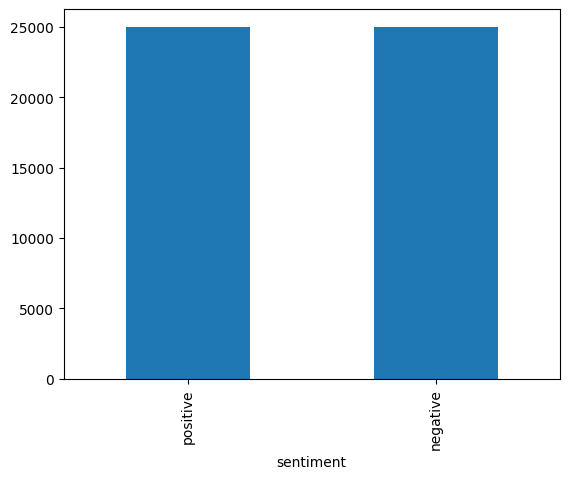

In [7]:
# Plotting the number of positive and negative value counts in the dataset
imdb_data['sentiment'].value_counts().plot.bar()
plt.show()

#### Splitting the dataset 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(imdb_data['review'],imdb_data['sentiment'],test_size=.2,random_state=42,stratify=imdb_data['sentiment'],shuffle=True)

In [9]:
train_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test],axis=1)

In [10]:
train_data.head()

,review,sentiment
47808,I caught this little gem totally by accident b...,positive
20154,I can't believe that I let myself into this mo...,negative
43069,*spoiler alert!* it just gets to me the nerve ...,negative
19413,If there's one thing I've learnt from watching...,negative
13673,"I remember when this was in theaters, reviews ...",negative


In [11]:
test_data.head()

,review,sentiment
18870,"Yes, MTV there really is a way to market Daria...",negative
39791,The story of the bride fair is an amusing and ...,negative
30381,"A team varied between Scully and Mulder, two o...",positive
42294,This was a popular movie probably because of t...,negative
33480,This movie made me so angry!! Here I am thinki...,negative


In [12]:
train_data.iloc[:1,:]['review']

47808    I caught this little gem totally by accident b...
Name: review, dtype: object

In [13]:
train_data.to_csv('Data/train_data.csv',index=False)
test_data.to_csv('Data/test_data.csv',index=False)

#### Text normalization

As it can be seen there are html tags in the text which need to be filtered and removed.

#### Removing html strips and noise text

In [14]:
# removing html strips and noise text 
# removing html strips
import re
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# removing square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

# removing the noise text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    return text

In [15]:
# applying the function on the reviews column
train_data['review'] = train_data['review'].apply(denoise_text)

/var/folders/cd/877rxqyx3x91g395x1hxbvnc0000gn/T/ipykernel_85111/501520246.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [16]:
test_data['review'] = test_data['review'].apply(denoise_text)

/var/folders/cd/877rxqyx3x91g395x1hxbvnc0000gn/T/ipykernel_85111/501520246.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [17]:
train_data['review']

47808    I caught this little gem totally by accident b...
20154    I cant believe that I let myself into this mov...
43069    spoiler alert it just gets to me the nerve som...
19413    If theres one thing Ive learnt from watching G...
13673    I remember when this was in theaters reviews s...
                               ...                        
31092    Its the 1920s And a man named Walt Disney was ...
22917    The first and only time I saw Shades was durin...
47481    This was such a waste of time Danger If you wa...
35597    this is by far the most pathetic movie Indian ...
27491    This movie forever left an impression on me I ...
Name: review, Length: 40000, dtype: object

In [18]:
test_data['review']

18870    Yes MTV there really is a way to market Daria ...
39791    The story of the bride fair is an amusing and ...
30381    A team varied between Scully and Mulder two ot...
42294    This was a popular movie probably because of t...
33480    This movie made me so angry Here I am thinking...
                               ...                        
3634     SILVER CITY 2 outta 5 stars As a huge fan of J...
47910    Moscow Zero stole my money and I want it back ...
16086    This is the only film Ive seen that is made by...
48294    This is a story about Shinae who moves to Mily...
4478     Leon Errol handles his double role of Uncle Ma...
Name: review, Length: 10000, dtype: object

In [19]:
import nltk
import ssl
import os

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [20]:
try:
    os.mkdir('sentimentAnalysis/lib/nltk_data')
except:
    pass
nltk.download('stopwords',download_dir='sentimentAnalysis/lib/nltk_data')

[nltk_data] Downloading package stopwords to
[nltk_data]     sentimentAnalysis/lib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [22]:
stopwords_list = nltk.corpus.stopwords.words('english')

In [23]:
def text_stemming(dataset,stopwords_list):
    corpus = []
    for row in range(dataset.shape[0]):
        review = dataset.iloc[row,0]
        review = review.lower()
        review = review.split()

        review = [ps.stem(word) for word in review if word not in stopwords_list]
        review = ' '.join(review)
        corpus.append(review)

    return pd.Series(corpus,index=dataset.index)

In [24]:
demo = text_stemming(train_data,stopwords_list)

In [25]:
train_data['review'] = demo.copy()

In [26]:
test_data['review'] = text_stemming(test_data,stopwords_list)

In [27]:
train_data.head()

,review,sentiment
47808,caught littl gem total accid back 1980 81 revi...,positive
20154,cant believ let movi accomplish favor friend a...,negative
43069,spoiler alert get nerv peopl remak use term lo...,negative
19413,there one thing ive learnt watch georg romero ...,negative
13673,rememb theater review said horribl well didnt ...,negative


In [28]:
test_data.head()

,review,sentiment
18870,ye mtv realli way market daria start clever te...,negative
39791,stori bride fair amus engag one filmmak credit...,negative
30381,team vari sculli mulder two scientist pilot gu...,positive
42294,popular movi probabl humor fastmov stori under...,negative
33480,movi made angri think here new horror movi one...,negative


##### Bag of Words model

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(min_df=0,max_df=1)
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

##### TF-TDF model